<a href="https://colab.research.google.com/github/GITGENome/renale/blob/main/Etude_maladie_renale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Première exploration du dataset

In [17]:
# Importation modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
#warnings.filterwarnings('ignore')

In [18]:
# Importation du dataset
nan = ["NaN", "NAN","\t43", "\t", "\t?"]
df_rein = pd.read_csv("https://raw.githubusercontent.com/MaskiVal/DataSets/main/kidney_disease.csv", na_values=nan)
pd.set_option("display.max_row", 111)

In [19]:
# 5 premiere lignes
display(df_rein.head())

# Information
display(df_rein.dtypes)

# Description
display(df_rein.describe())

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,399.000000,385.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,314.000000,294.000000,269.000000
mean,199.892231,51.615584,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.687898,8406.122449,4.707435
std,115.492678,17.270301,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,9.156679,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,100.500000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,200.000000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.500000,65.000000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,46.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


# Data Cleaning

In [20]:
# Information des colonnes de type object
for col in df_rein.select_dtypes(object):
  print(f"{col} : {[i for i in df_rein[col].unique()]}\n")

rbc : [nan, 'normal', 'abnormal']

pc : ['normal', 'abnormal', nan]

pcc : ['notpresent', 'present', nan]

ba : ['notpresent', 'present', nan]

htn : ['yes', 'no', nan]

dm : ['yes', 'no', ' yes', '\tno', '\tyes', nan]

cad : ['no', 'yes', '\tno', nan]

appet : ['good', 'poor', nan]

pe : ['no', 'yes', nan]

ane : ['no', 'yes', nan]

classification : ['ckd', 'ckd\t', 'notckd']



Nous observons, qu'il y a des données avec des erreurs de frappe.

In [21]:
# Nettoyage et encodage
df_rein['dm'].replace({'\tno':'no', '\tyes':'yes', ' yes':'yes'},inplace=True)
df_rein['cad'].replace({'\tno':'no'}, inplace = True)
df_rein['classification'].replace({'ckd' : 'yes', 'ckd\t' : 'yes', 'notckd' : 'no' }, inplace = True)

# Changement nom de colonne
df_rein.rename(columns={'classification':'ill'}, inplace = True)

In [22]:
df_rein.isna().mean()*100

id        0.25
age       3.75
bp        3.00
sg       11.75
al       11.50
su       12.25
rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
bgr      11.00
bu        4.75
sc        4.25
sod      21.75
pot      22.00
hemo     13.00
pcv      21.50
wc       26.50
rc       32.75
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
ill       0.00
dtype: float64

<Axes: >

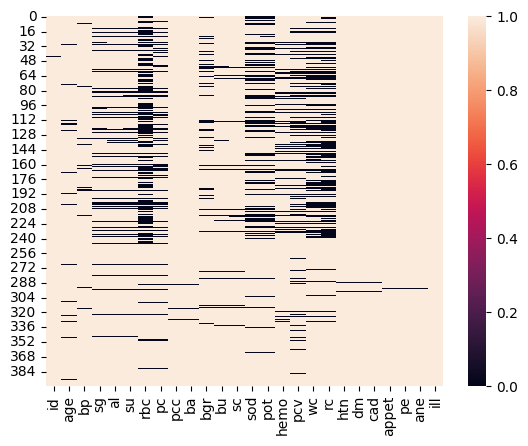

In [23]:
# Utilisation d'une heatmap pour visualiser les valeurs manquantes
sns.heatmap(df_rein.notna())

<Axes: >

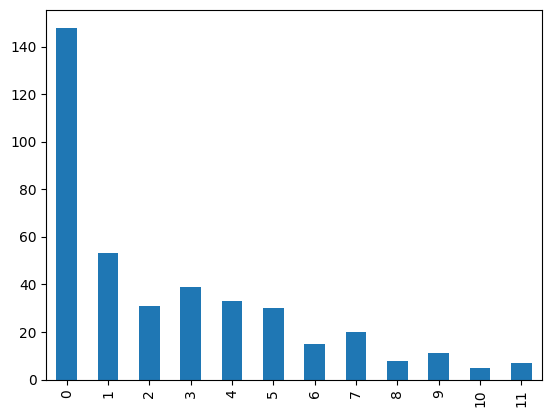

In [24]:
df_rein.isna().sum(axis=1).value_counts().sort_index().plot.bar()

J'enleve toutes les lignes avec un minimum de 6 valeurs manquantes sur la même ligne.

In [25]:
df_rein = df_rein[df_rein.isna().sum(axis=1)<=5]

In [26]:
# Je remplace toutes les valeurs de types category par la valeur la plus présente
for col in df_rein.select_dtypes(object).columns:
  df_rein[col] = df_rein[col].fillna(df_rein[col].mode()[0])

<ipython-input-26-9d9901c2767a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rein[col] = df_rein[col].fillna(df_rein[col].mode()[0])
<ipython-input-26-9d9901c2767a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rein[col] = df_rein[col].fillna(df_rein[col].mode()[0])
<ipython-input-26-9d9901c2767a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [27]:
# Remplacement des valeurs manquantes numériques par la moyenne
col_num = df_rein.select_dtypes([int,float]).columns.to_list()
df_rein[col_num] = df_rein[col_num].fillna(df_rein[col_num].mean())

<ipython-input-27-d368cefe015c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rein[col_num] = df_rein[col_num].fillna(df_rein[col_num].mean())


In [28]:
# colonne category
col_cat = df_rein.select_dtypes(object).columns.to_list()

# Data visualisation

14
















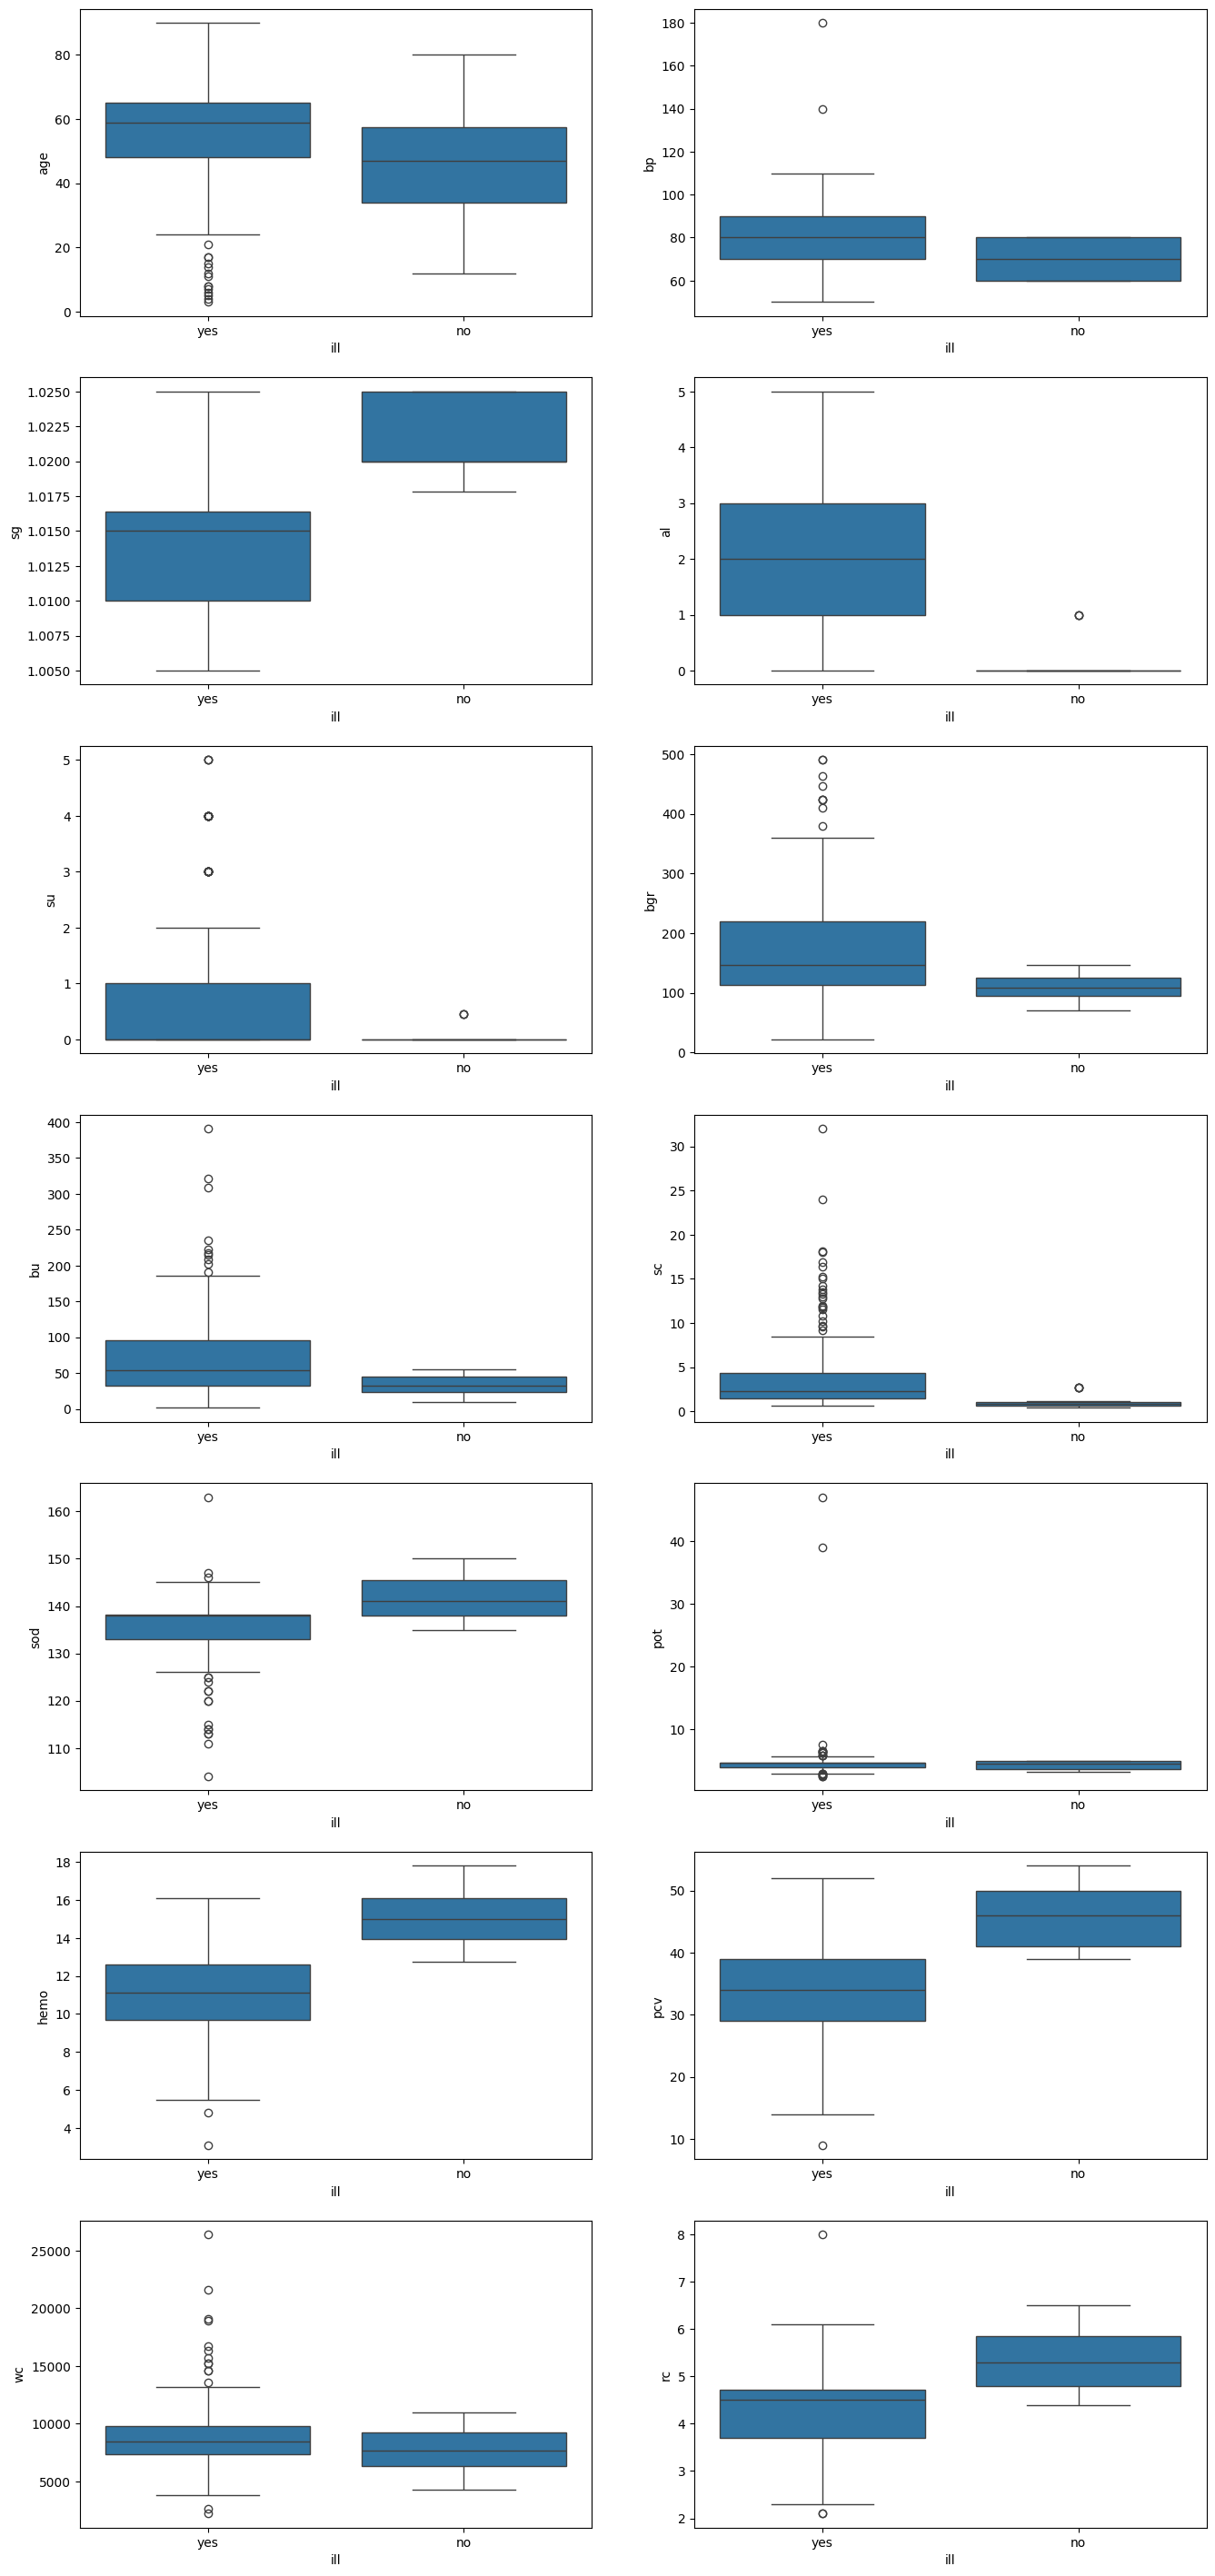

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [13]:
nbre_ligne = 7
nbre_cols = 2

fig, axes = plt.subplots(nbre_ligne, nbre_cols, figsize=(16, 36))
list_cols = df_rein.drop(columns = 'id').select_dtypes([int,float]).columns

print(len(list_cols))

id = 0
for row in range(nbre_ligne):
  for col in range(nbre_cols):
    if id < len(list_cols):
      plt.figure(figsize = (12,8))
      sns.boxplot(y = df_rein[list_cols[id]], x = df_rein['ill'], ax=axes[row,col])#.set(title=list_cols[id])
      id += 1
  print("\n")

# for col in df_rein.drop(columns = 'id').select_dtypes([int,float]).columns:
#   plt.figure()
#   sns.boxplot(x = df_rein[col])
#   #plt.title(col)
#   plt.show()
#   print("\n")

Les boxplots nous indique que nous avons la plupart des outliers qui sont du côté, des patients atteint d'une maladie.

14


<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='yes'], ax=axes[row,col], label = 'positif', color='r')
<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rei

<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_col

<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_col

<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_col

<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_col

<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_col

<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_col

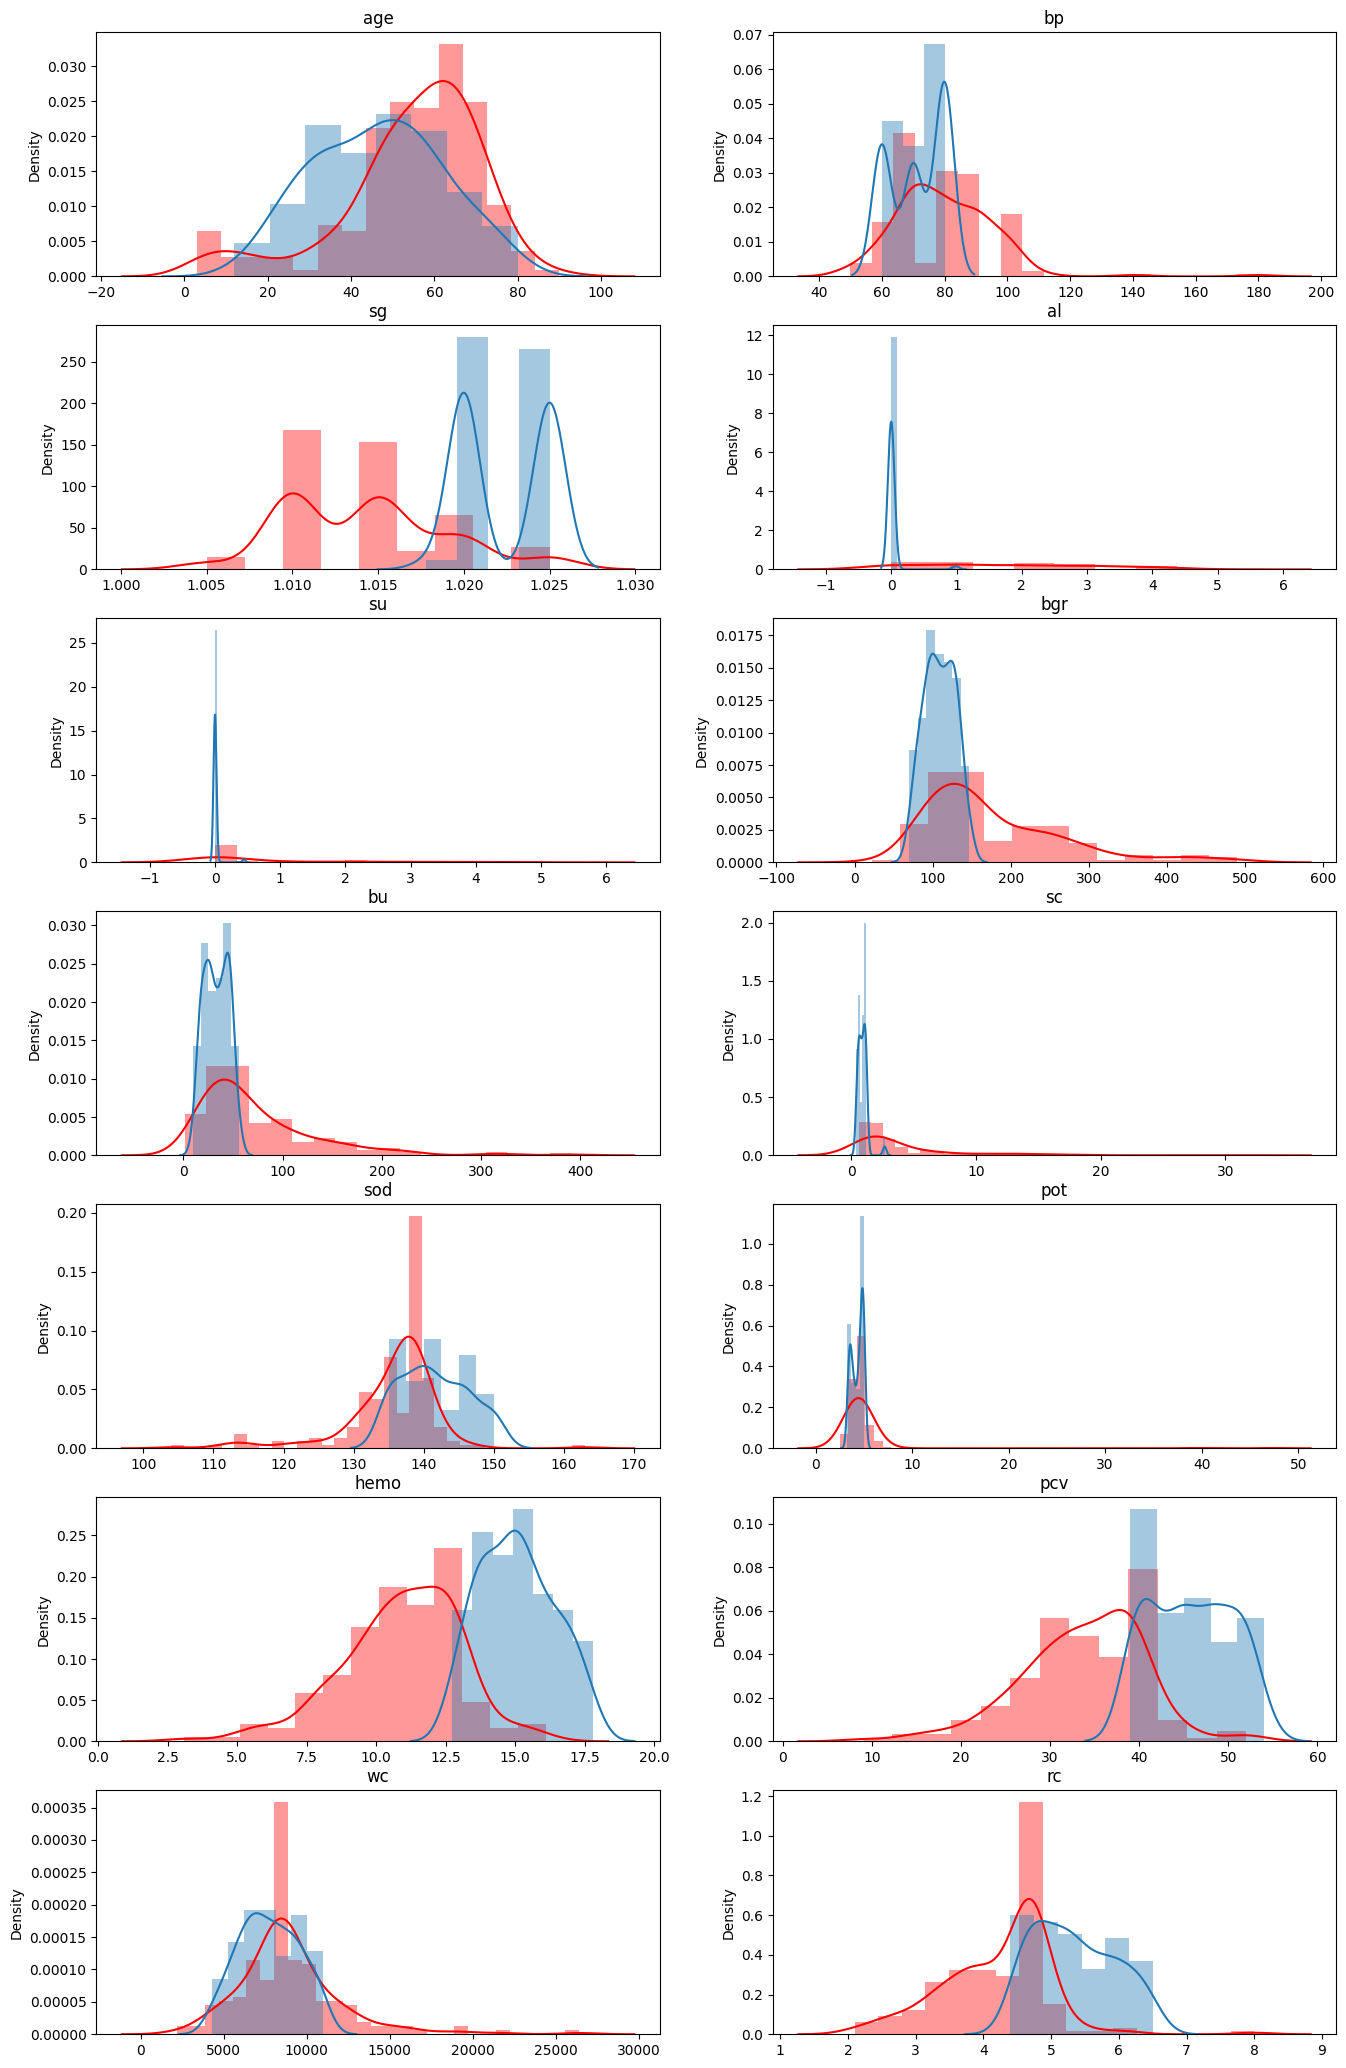

In [14]:
nbre_ligne = 7
nbre_cols = 2

fig, axes = plt.subplots(nbre_ligne, nbre_cols, figsize=(16, 26))
list_cols = df_rein.drop(columns = 'id').select_dtypes([int,float]).columns

print(len(list_cols))

id = 0
for row in range(nbre_ligne):
  for col in range(nbre_cols):
    if id < len(list_cols):
      #plt.figure(figsize = (12,8))
      sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='yes'], ax=axes[row,col], label = 'positif', color='r')
      sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
      id += 1
  print("\n")

Les distplots nous apportent une certaine tendance à propos des individues atteint de la maladie :
- variable basse par rapport à la normale : albumine, taux de sucre, créatine sérique
- variable haute par apport à la normale : densité urinaire, l'hémoglobine, le volume d'hématocytes et le nombre de globules rouges.


In [15]:
liste = df_rein.select_dtypes(exclude=object).columns.to_list()
liste.append('ill')


In [16]:
#len(col_pairplot)

In [17]:
# col_pairplot = df_rein.select_dtypes([int,float]).columns.to_list()
# col_pairplot.append('ill')
# sns.pairplot(data = df_rein[col_pairplot], hue='ill')

<Axes: >

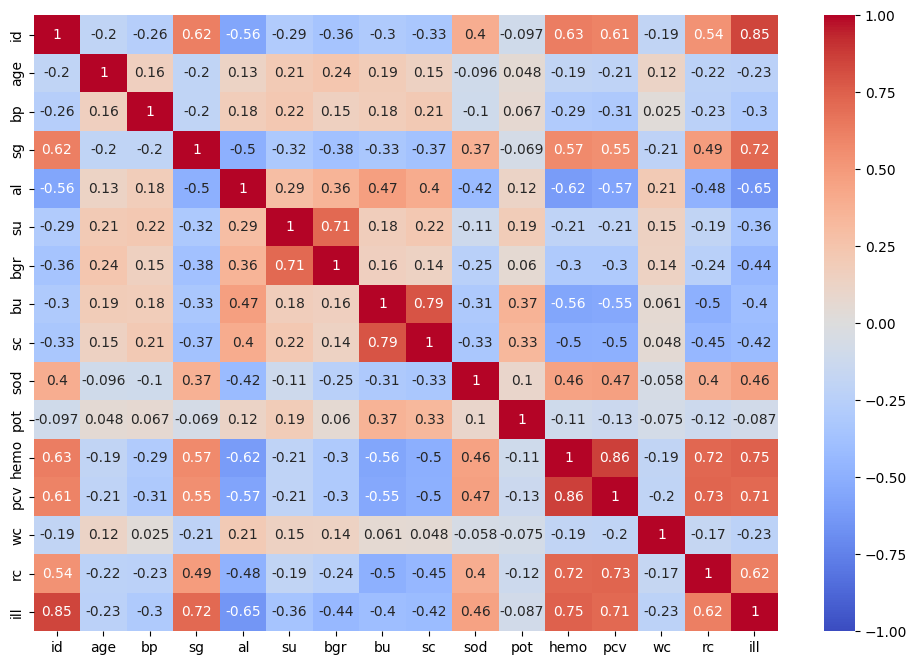

In [29]:
plt.figure(figsize=(12,8))
df_rein['ill'] = df_rein['ill'].factorize()[0]
sns.heatmap(df_rein.corr(), cmap = 'coolwarm', annot = True, vmin = -1)

Dans cette heatmap, nous avons quelques corrélation interessantes : le rc avec lepcv et l'hemo

# Plotly

In [32]:
import plotly.express as px
fig = px.scatter_3d(x = df_rein['hemo'],
                                y = df_rein['sod'],
                                z = df_rein['sg'],
                                color = df_rein['ill']
                    ) #Complete this code
fig.show()

# Test statistique

In [29]:
# Test ANOVA
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = []

for col in col_num:
    result = smf.ols(f'{col} ~ ill', data=df_rein).fit()
    table = sm.stats.anova_lm(result)
    F = table.iloc[0, 3]  # The F-statistic
    p_value = table.iloc[0, 4]  # The p-value
    results.append((col, F, p_value))

df_anova = pd.DataFrame(results, columns=['col', 'F', 'p_value'])
df_anova


,col,F,p_value
0,id,868.319616,1.138919e-94
1,age,19.170284,1.604336e-05
2,bp,33.483421,1.663001e-08
3,sg,353.280642,3.455108e-54
4,al,238.388351,6.505620e-41
5,su,48.265256,1.973701e-11
6,bgr,81.951721,1.210305e-17
7,bu,62.844002,3.433902e-14
8,sc,69.211340,2.320511e-15
9,sod,89.150904,6.694875e-19



À l'exception du taux de potassium, toutes les variables numériques semblent avoir une influence sur la probabilité qu'un patient soit atteint d'une maladie rénale chronique

In [30]:
#Test chi2 pour détecter quelles variables influent sur la probabilité que le patient soit atteint de la maladie
from scipy.stats import chi2_contingency

results = []

for col in col_cat:
    table = pd.crosstab(df_rein[col], df_rein['ill'])
    test = chi2_contingency(table)
    statistique = test[0]
    p_value = test[1]
    degre_liberte = test[2]
    results.append((col, statistique, p_value, degre_liberte))

df_chi2 = pd.DataFrame(results, columns=['col', 'statistique', 'p_value', 'degre_liberte'])
df_chi2

,col,statistique,p_value,degre_liberte
0,rbc,35.749556,2.243831e-09,1
1,pc,66.131054,4.219159e-16,1
2,pcc,32.718042,1.065437e-08,1
3,ba,13.999509,1.828583e-04,1
4,htn,138.826772,4.805947e-32,1
5,dm,114.502239,1.011520e-26,1
6,cad,22.114765,2.568267e-06,1
7,appet,63.669526,1.471433e-15,1
8,pe,53.034576,3.277284e-13,1
9,ane,38.844293,4.589938e-10,1


Avec toutes les p_value < 0.05 toute les variables ne sont independantes.

In [32]:
df_rein.dtypes

id       float64
age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wc       float64
rc       float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
ill       object
dtype: object

#Machine learning

In [33]:
df_rein

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,ill
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,yes
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.711832,no,no,no,good,no,no,yes
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.711832,no,yes,no,poor,no,yes,yes
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,yes
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.600000,no,no,no,good,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.900000,no,no,no,good,no,no,no
396,396.0,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.200000,no,no,no,good,no,no,no
397,397.0,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.400000,no,no,no,good,no,no,no
398,398.0,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.900000,no,no,no,good,no,no,no


In [35]:
!pip install lazypredict

In [37]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X = df_rein.drop(columns=['ill','id','hemo']).select_dtypes(exclude = object)
y= df_rein['ill']
print(X.columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'pcv',
       'wc', 'rc'],
      dtype='object')


In [38]:
X.dtypes

age    float64
bp     float64
sg     float64
al     float64
su     float64
bgr    float64
bu     float64
sc     float64
sod    float64
pot    float64
pcv    float64
wc     float64
rc     float64
dtype: object

In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25,random_state =123)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 27.82it/s]

[LightGBM] [Info] Number of positive: 140, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 250, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560000 -> initscore=0.241162
[LightGBM] [Info] Start training from score 0.241162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,1.00,1.00,None,1.00,0.04
BernoulliNB,0.99,0.99,None,0.99,0.02
SVC,0.99,0.99,None,0.99,0.02
SGDClassifier,0.99,0.99,None,0.99,0.01
Perceptron,0.99,0.99,None,0.99,0.01
ExtraTreesClassifier,0.99,0.99,None,0.99,0.13
NuSVC,0.99,0.99,None,0.99,0.02
LogisticRegression,0.99,0.99,None,0.99,0.03
LinearSVC,0.98,0.98,None,0.98,0.02


In [22]:
print(X.columns)
print(y)

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'pcv',
       'wc', 'rc'],
      dtype='object')
0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
395     no
396     no
397     no
398     no
399     no
Name: ill, Length: 334, dtype: object


In [39]:
import numpy as np
dictionaire = {'SVC' : {'kernel' : ['linear', 'rbf', 'poly'],
                      'gamma' : [0.1, 1, 10, 100],
                      'C' : [0.1, 1, 10, 100, 1000],
                      'degree' : [0, 1, 2, 3, 4, 5, 6, 'scale'],
                      'shrinking' : [True, False],
                        'random_state' : [42]},
               'LogisticRegression' : {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                                       'C' : [0.1, 1, 10, 100, 1000],
                                       'random_state' : [42]},
               'LinearSVC' : {'loss' : ['hinge', 'squared_hinge'],
                              'C' : [0.1, 1, 10, 100, 1000],
                              'intercept_scaling' : [1, 10, 100, 1000],
                              'penalty' : ['l1', 'l2'],
                              'multi_class' : ['ovr', 'crammer_singer'],
                              'max_iter' : [100, 500, 1000],
                              'random_state' : [42]},
                'Perceptron' : {'eta0' : [0.0001, 0.001, 0.01, 0.1, 1.0],
                                'max_iter' : [1, 10, 100, 1000],
                                'random_state' : [42],
                                'alpha' : [0.0001, 0.001, 0.01, 0.1],
                                'penalty' : ['l2','l1','elasticnet'],
                                'tol' : [None, 0.001, 0.002, 0.01, 0.1],
                                'class_weight' : [None, 'balanced'],
                                'random_state' : [42]
                                },
               'SGDClassifier' : {"loss":["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron", "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
                                  "penalty":["l2", "l1", "elasticnet"],
                                  "learning_rate": ['optimal','adaptive',"invscaling"],
                                  "eta0" :  [0.01, 0.1, 0.5, 1],
                                  "validation_fraction": [0,0.1,0.5,0.7,1],
                                  "class_weight": [None,"balanced"],
                                  "warm_start": [False, True],
                                  #"average": [False]+[i for i in np.arange(0,1.1,0.1)],
                                  'random_state' : [42]},
               "GaussianNB" : {'var_smoothing': [1e-11, 1e-10, 1e-9]}}



import numpy as np

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer, Normalizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, KBinsDiscretizer, Binarizer

from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

liste_scaler = [StandardScaler(),
                  MinMaxScaler(),
                  MaxAbsScaler(),
                  QuantileTransformer(),
                  PowerTransformer(),
                  Normalizer()]
liste_encoder = [OneHotEncoder(),
                  OrdinalEncoder(),
                  KBinsDiscretizer(),
                  Binarizer()]

nbre_combinaison = len(liste_scaler)*len(liste_encoder)

# Combinaisons des listes

scaler_encoder = [(scaler, encoder) for scaler in liste_scaler for encoder in liste_encoder]


def find_best_param(X, y, model, scaler_encoder):
  i = 1

  for scaler, encoder in scaler_encoder:
      selector_num_cols = selector(dtype_exclude=object)
      selector_cat_cols = selector(dtype_include=object)

      num_cols = selector_num_cols(X)
      cat_cols = selector_cat_cols(X)


      num_preprocessor = scaler
      cat_preprocessor = encoder

      preprocessor = ColumnTransformer(
                  [
                      (str(cat_preprocessor)[:-2], cat_preprocessor, cat_cols),
                      (str(num_preprocessor)[:-2], num_preprocessor, num_cols),
                  ]
              )
      random = RandomizedSearchCV(model,
                                              dictionaire[str(model)[:-2]],
                                              n_iter= 10,
                                              cv = 5)

      Model = make_pipeline(
                                  preprocessor,
                                  random
                              )


      X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)
      Model.fit(X_train, y_train)

      print('Scaler', scaler)
      print('Encoder', encoder)
      print(f'For {model} the best parametres are \n {random.best_params_}')
      print(f' Accuracy train : {Model.score(X_train, y_train)}')
      print(f' Accuracy test : {Model.score(X_test, y_test)}')
      print('Model',f"{list(dictionaire.keys()).index(str(model)[:-2])}/{len(dictionaire)}")
      print('Pipelines testés :',f"{i}/{len(scaler_encoder)}\n")
      if i == scaler_encoder:
        i=1
      else:
        i+=1

      display(pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = Model.predict(X_test)),
          columns = np.array([str(i) for i in Model.classes_]).astype(object) + ' predicted',
          index = np.array([str(i) for i in Model.classes_]).astype(object) + ' actual'
          ))



for model in list(dictionaire.keys()):
  exec(f"find_best_param(X, y,{model}(),scaler_encoder)")

Scaler StandardScaler()
Encoder OneHotEncoder()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'linear', 'gamma': 1, 'degree': 4, 'C': 1000}
 Accuracy train : 1.0
 Accuracy test : 0.9552238805970149
Model 0/6
Pipelines testés : 1/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler StandardScaler()
Encoder OrdinalEncoder()
For SVC() the best parametres are 
 {'shrinking': False, 'random_state': 42, 'kernel': 'linear', 'gamma': 100, 'degree': 4, 'C': 0.1}
 Accuracy train : 0.9775280898876404
 Accuracy test : 0.9701492537313433
Model 0/6
Pipelines testés : 2/24



,no predicted,yes predicted
no actual,27,0
yes actual,2,38


Scaler StandardScaler()
Encoder KBinsDiscretizer()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'linear', 'gamma': 1, 'degree': 4, 'C': 10}
 Accuracy train : 0.9962546816479401
 Accuracy test : 0.9552238805970149
Model 0/6
Pipelines testés : 3/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler StandardScaler()
Encoder Binarizer()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'linear', 'gamma': 1, 'degree': 3, 'C': 10}
 Accuracy train : 0.9962546816479401
 Accuracy test : 0.9552238805970149
Model 0/6
Pipelines testés : 4/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler MinMaxScaler()
Encoder OneHotEncoder()
For SVC() the best parametres are 
 {'shrinking': False, 'random_state': 42, 'kernel': 'poly', 'gamma': 100, 'degree': 2, 'C': 100}
 Accuracy train : 1.0
 Accuracy test : 0.9552238805970149
Model 0/6
Pipelines testés : 5/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler MinMaxScaler()
Encoder OrdinalEncoder()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'linear', 'gamma': 10, 'degree': 0, 'C': 100}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9552238805970149
Model 0/6
Pipelines testés : 6/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler MinMaxScaler()
Encoder KBinsDiscretizer()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'linear', 'gamma': 0.1, 'degree': 1, 'C': 100}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9552238805970149
Model 0/6
Pipelines testés : 7/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler MinMaxScaler()
Encoder Binarizer()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'rbf', 'gamma': 10, 'degree': 0, 'C': 1}
 Accuracy train : 0.9887640449438202
 Accuracy test : 1.0
Model 0/6
Pipelines testés : 8/24



,no predicted,yes predicted
no actual,27,0
yes actual,0,40


Scaler MaxAbsScaler()
Encoder OneHotEncoder()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'linear', 'gamma': 100, 'degree': 4, 'C': 1000}
 Accuracy train : 0.9850187265917603
 Accuracy test : 0.9701492537313433
Model 0/6
Pipelines testés : 9/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler MaxAbsScaler()
Encoder OrdinalEncoder()
For SVC() the best parametres are 
 {'shrinking': False, 'random_state': 42, 'kernel': 'linear', 'gamma': 0.1, 'degree': 1, 'C': 1000}
 Accuracy train : 0.9850187265917603
 Accuracy test : 0.9701492537313433
Model 0/6
Pipelines testés : 10/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler MaxAbsScaler()
Encoder KBinsDiscretizer()
For SVC() the best parametres are 
 {'shrinking': False, 'random_state': 42, 'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, 'C': 1000}
 Accuracy train : 0.9812734082397003
 Accuracy test : 0.9850746268656716
Model 0/6
Pipelines testés : 11/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler MaxAbsScaler()
Encoder Binarizer()
For SVC() the best parametres are 
 {'shrinking': False, 'random_state': 42, 'kernel': 'linear', 'gamma': 1, 'degree': 4, 'C': 1000}
 Accuracy train : 0.9850187265917603
 Accuracy test : 0.9701492537313433
Model 0/6
Pipelines testés : 12/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler QuantileTransformer()
Encoder OneHotEncoder()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'poly', 'gamma': 0.1, 'degree': 3, 'C': 100}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9701492537313433
Model 0/6
Pipelines testés : 13/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler QuantileTransformer()
Encoder OrdinalEncoder()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'linear', 'gamma': 1, 'degree': 4, 'C': 100}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9253731343283582
Model 0/6
Pipelines testés : 14/24



,no predicted,yes predicted
no actual,25,2
yes actual,3,37


Scaler QuantileTransformer()
Encoder KBinsDiscretizer()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'linear', 'gamma': 10, 'degree': 3, 'C': 0.1}
 Accuracy train : 0.9737827715355806
 Accuracy test : 0.9701492537313433
Model 0/6
Pipelines testés : 15/24



,no predicted,yes predicted
no actual,27,0
yes actual,2,38


Scaler QuantileTransformer()
Encoder Binarizer()
For SVC() the best parametres are 
 {'shrinking': False, 'random_state': 42, 'kernel': 'poly', 'gamma': 10, 'degree': 4, 'C': 10}
 Accuracy train : 1.0
 Accuracy test : 0.9552238805970149
Model 0/6
Pipelines testés : 16/24



,no predicted,yes predicted
no actual,25,2
yes actual,1,39


Scaler PowerTransformer()
Encoder OneHotEncoder()
For SVC() the best parametres are 
 {'shrinking': False, 'random_state': 42, 'kernel': 'poly', 'gamma': 100, 'degree': 3, 'C': 100}
 Accuracy train : 1.0
 Accuracy test : 0.9701492537313433
Model 0/6
Pipelines testés : 17/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler PowerTransformer()
Encoder OrdinalEncoder()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'linear', 'gamma': 100, 'degree': 2, 'C': 1}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9402985074626866
Model 0/6
Pipelines testés : 18/24



,no predicted,yes predicted
no actual,26,1
yes actual,3,37


Scaler PowerTransformer()
Encoder KBinsDiscretizer()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'linear', 'gamma': 10, 'degree': 1, 'C': 1}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9402985074626866
Model 0/6
Pipelines testés : 19/24



,no predicted,yes predicted
no actual,26,1
yes actual,3,37


Scaler PowerTransformer()
Encoder Binarizer()
For SVC() the best parametres are 
 {'shrinking': False, 'random_state': 42, 'kernel': 'linear', 'gamma': 1, 'degree': 4, 'C': 1}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9402985074626866
Model 0/6
Pipelines testés : 20/24



,no predicted,yes predicted
no actual,26,1
yes actual,3,37


Scaler Normalizer()
Encoder OneHotEncoder()
For SVC() the best parametres are 
 {'shrinking': False, 'random_state': 42, 'kernel': 'rbf', 'gamma': 1, 'degree': 5, 'C': 1000}
 Accuracy train : 0.8539325842696629
 Accuracy test : 0.8507462686567164
Model 0/6
Pipelines testés : 21/24



,no predicted,yes predicted
no actual,26,1
yes actual,9,31


Scaler Normalizer()
Encoder OrdinalEncoder()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'poly', 'gamma': 10, 'degree': 3, 'C': 100}
 Accuracy train : 0.947565543071161
 Accuracy test : 0.9402985074626866
Model 0/6
Pipelines testés : 22/24



,no predicted,yes predicted
no actual,27,0
yes actual,4,36


Scaler Normalizer()
Encoder KBinsDiscretizer()
For SVC() the best parametres are 
 {'shrinking': True, 'random_state': 42, 'kernel': 'poly', 'gamma': 100, 'degree': 3, 'C': 10}
 Accuracy train : 0.9700374531835206
 Accuracy test : 0.9552238805970149
Model 0/6
Pipelines testés : 23/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler Normalizer()
Encoder Binarizer()
For SVC() the best parametres are 
 {'shrinking': False, 'random_state': 42, 'kernel': 'poly', 'gamma': 10, 'degree': 5, 'C': 10}
 Accuracy train : 0.9775280898876404
 Accuracy test : 0.9402985074626866
Model 0/6
Pipelines testés : 24/24



,no predicted,yes predicted
no actual,26,1
yes actual,3,37


Scaler StandardScaler()
Encoder OneHotEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'C': 100}
 Accuracy train : 1.0
 Accuracy test : 0.9552238805970149
Model 1/6
Pipelines testés : 1/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler StandardScaler()
Encoder OrdinalEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'newton-cg', 'random_state': 42, 'C': 100}
 Accuracy train : 1.0
 Accuracy test : 0.9552238805970149
Model 1/6
Pipelines testés : 2/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler StandardScaler()
Encoder KBinsDiscretizer()
For LogisticRegression() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'C': 1000}
 Accuracy train : 1.0
 Accuracy test : 0.9552238805970149
Model 1/6
Pipelines testés : 3/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler StandardScaler()
Encoder Binarizer()
For LogisticRegression() the best parametres are 
 {'solver': 'newton-cg', 'random_state': 42, 'C': 1000}
 Accuracy train : 1.0
 Accuracy test : 0.9552238805970149
Model 1/6
Pipelines testés : 4/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler MinMaxScaler()
Encoder OneHotEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'liblinear', 'random_state': 42, 'C': 100}
 Accuracy train : 0.9887640449438202
 Accuracy test : 0.9701492537313433
Model 1/6
Pipelines testés : 5/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler MinMaxScaler()
Encoder OrdinalEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'C': 1000}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9552238805970149
Model 1/6
Pipelines testés : 6/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler MinMaxScaler()
Encoder KBinsDiscretizer()
For LogisticRegression() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'C': 1000}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9552238805970149
Model 1/6
Pipelines testés : 7/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler MinMaxScaler()
Encoder Binarizer()
For LogisticRegression() the best parametres are 
 {'solver': 'newton-cg', 'random_state': 42, 'C': 1000}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9552238805970149
Model 1/6
Pipelines testés : 8/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler MaxAbsScaler()
Encoder OneHotEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'newton-cg', 'random_state': 42, 'C': 1000}
 Accuracy train : 0.9812734082397003
 Accuracy test : 0.9701492537313433
Model 1/6
Pipelines testés : 9/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler MaxAbsScaler()
Encoder OrdinalEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'C': 1000}
 Accuracy train : 0.9812734082397003
 Accuracy test : 0.9701492537313433
Model 1/6
Pipelines testés : 10/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler MaxAbsScaler()
Encoder KBinsDiscretizer()
For LogisticRegression() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'C': 1000}
 Accuracy train : 0.9812734082397003
 Accuracy test : 0.9701492537313433
Model 1/6
Pipelines testés : 11/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler MaxAbsScaler()
Encoder Binarizer()
For LogisticRegression() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'C': 1000}
 Accuracy train : 0.9812734082397003
 Accuracy test : 0.9701492537313433
Model 1/6
Pipelines testés : 12/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler QuantileTransformer()
Encoder OneHotEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'newton-cg', 'random_state': 42, 'C': 10}
 Accuracy train : 0.9850187265917603
 Accuracy test : 0.9552238805970149
Model 1/6
Pipelines testés : 13/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler QuantileTransformer()
Encoder OrdinalEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'C': 10}
 Accuracy train : 0.9850187265917603
 Accuracy test : 0.9552238805970149
Model 1/6
Pipelines testés : 14/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler QuantileTransformer()
Encoder KBinsDiscretizer()
For LogisticRegression() the best parametres are 
 {'solver': 'newton-cg', 'random_state': 42, 'C': 10}
 Accuracy train : 0.9850187265917603
 Accuracy test : 0.9552238805970149
Model 1/6
Pipelines testés : 15/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler QuantileTransformer()
Encoder Binarizer()
For LogisticRegression() the best parametres are 
 {'solver': 'newton-cg', 'random_state': 42, 'C': 10}
 Accuracy train : 0.9850187265917603
 Accuracy test : 0.9552238805970149
Model 1/6
Pipelines testés : 16/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler PowerTransformer()
Encoder OneHotEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'newton-cg', 'random_state': 42, 'C': 100}
 Accuracy train : 1.0
 Accuracy test : 0.9402985074626866
Model 1/6
Pipelines testés : 17/24



,no predicted,yes predicted
no actual,26,1
yes actual,3,37


Scaler PowerTransformer()
Encoder OrdinalEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'C': 10}
 Accuracy train : 0.9962546816479401
 Accuracy test : 0.9402985074626866
Model 1/6
Pipelines testés : 18/24



,no predicted,yes predicted
no actual,26,1
yes actual,3,37


Scaler PowerTransformer()
Encoder KBinsDiscretizer()
For LogisticRegression() the best parametres are 
 {'solver': 'newton-cg', 'random_state': 42, 'C': 1}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9552238805970149
Model 1/6
Pipelines testés : 19/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler PowerTransformer()
Encoder Binarizer()
For LogisticRegression() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'C': 10}
 Accuracy train : 0.9962546816479401
 Accuracy test : 0.9402985074626866
Model 1/6
Pipelines testés : 20/24



,no predicted,yes predicted
no actual,26,1
yes actual,3,37


Scaler Normalizer()
Encoder OneHotEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'liblinear', 'random_state': 42, 'C': 100}
 Accuracy train : 0.7303370786516854
 Accuracy test : 0.7164179104477612
Model 1/6
Pipelines testés : 21/24



,no predicted,yes predicted
no actual,13,14
yes actual,5,35


Scaler Normalizer()
Encoder OrdinalEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'newton-cg', 'random_state': 42, 'C': 1000}
 Accuracy train : 0.8614232209737828
 Accuracy test : 0.8507462686567164
Model 1/6
Pipelines testés : 22/24



,no predicted,yes predicted
no actual,26,1
yes actual,9,31


Scaler Normalizer()
Encoder KBinsDiscretizer()
For LogisticRegression() the best parametres are 
 {'solver': 'liblinear', 'random_state': 42, 'C': 1000}
 Accuracy train : 0.8614232209737828
 Accuracy test : 0.8507462686567164
Model 1/6
Pipelines testés : 23/24



,no predicted,yes predicted
no actual,26,1
yes actual,9,31


Scaler Normalizer()
Encoder Binarizer()
For LogisticRegression() the best parametres are 
 {'solver': 'liblinear', 'random_state': 42, 'C': 1000}
 Accuracy train : 0.8614232209737828
 Accuracy test : 0.8507462686567164
Model 1/6
Pipelines testés : 24/24



,no predicted,yes predicted
no actual,26,1
yes actual,9,31


Scaler StandardScaler()
Encoder OneHotEncoder()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'ovr', 'max_iter': 500, 'loss': 'hinge', 'intercept_scaling': 1, 'C': 10}
 Accuracy train : 0.9887640449438202
 Accuracy test : 0.9402985074626866
Model 2/6
Pipelines testés : 1/24



,no predicted,yes predicted
no actual,25,2
yes actual,2,38


Scaler StandardScaler()
Encoder OrdinalEncoder()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 100, 'loss': 'squared_hinge', 'intercept_scaling': 100, 'C': 10}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9552238805970149
Model 2/6
Pipelines testés : 2/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler StandardScaler()
Encoder KBinsDiscretizer()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 100, 'loss': 'squared_hinge', 'intercept_scaling': 100, 'C': 100}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9552238805970149
Model 2/6
Pipelines testés : 3/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler StandardScaler()
Encoder Binarizer()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l1', 'multi_class': 'crammer_singer', 'max_iter': 100, 'loss': 'squared_hinge', 'intercept_scaling': 10, 'C': 10}
 Accuracy train : 0.9962546816479401
 Accuracy test : 0.9552238805970149
Model 2/6
Pipelines testés : 4/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler MinMaxScaler()
Encoder OneHotEncoder()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 100, 'loss': 'hinge', 'intercept_scaling': 1, 'C': 10}
 Accuracy train : 0.9850187265917603
 Accuracy test : 0.9701492537313433
Model 2/6
Pipelines testés : 5/24



,no predicted,yes predicted
no actual,27,0
yes actual,2,38


Scaler MinMaxScaler()
Encoder OrdinalEncoder()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l1', 'multi_class': 'crammer_singer', 'max_iter': 100, 'loss': 'hinge', 'intercept_scaling': 10, 'C': 100}
 Accuracy train : 0.9962546816479401
 Accuracy test : 0.9552238805970149
Model 2/6
Pipelines testés : 6/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler MinMaxScaler()
Encoder KBinsDiscretizer()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 500, 'loss': 'squared_hinge', 'intercept_scaling': 10, 'C': 100}
 Accuracy train : 0.9962546816479401
 Accuracy test : 0.9552238805970149
Model 2/6
Pipelines testés : 7/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler MinMaxScaler()
Encoder Binarizer()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 100, 'loss': 'squared_hinge', 'intercept_scaling': 1, 'C': 100}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9402985074626866
Model 2/6
Pipelines testés : 8/24



,no predicted,yes predicted
no actual,25,2
yes actual,2,38


Scaler MaxAbsScaler()
Encoder OneHotEncoder()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 1000, 'loss': 'hinge', 'intercept_scaling': 100, 'C': 10}
 Accuracy train : 0.9625468164794008
 Accuracy test : 0.9701492537313433
Model 2/6
Pipelines testés : 9/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler MaxAbsScaler()
Encoder OrdinalEncoder()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 1000, 'loss': 'hinge', 'intercept_scaling': 100, 'C': 10}
 Accuracy train : 0.9625468164794008
 Accuracy test : 0.9701492537313433
Model 2/6
Pipelines testés : 10/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler MaxAbsScaler()
Encoder KBinsDiscretizer()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 500, 'loss': 'squared_hinge', 'intercept_scaling': 10, 'C': 100}
 Accuracy train : 0.9812734082397003
 Accuracy test : 0.9701492537313433
Model 2/6
Pipelines testés : 11/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler MaxAbsScaler()
Encoder Binarizer()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l1', 'multi_class': 'crammer_singer', 'max_iter': 500, 'loss': 'squared_hinge', 'intercept_scaling': 1, 'C': 1000}
 Accuracy train : 0.9850187265917603
 Accuracy test : 0.9701492537313433
Model 2/6
Pipelines testés : 12/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler QuantileTransformer()
Encoder OneHotEncoder()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 1000, 'loss': 'hinge', 'intercept_scaling': 1, 'C': 1000}
 Accuracy train : 1.0
 Accuracy test : 0.9253731343283582
Model 2/6
Pipelines testés : 13/24



,no predicted,yes predicted
no actual,25,2
yes actual,3,37


Scaler QuantileTransformer()
Encoder OrdinalEncoder()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l1', 'multi_class': 'crammer_singer', 'max_iter': 1000, 'loss': 'hinge', 'intercept_scaling': 1, 'C': 0.1}
 Accuracy train : 0.9700374531835206
 Accuracy test : 0.9701492537313433
Model 2/6
Pipelines testés : 14/24



,no predicted,yes predicted
no actual,27,0
yes actual,2,38


Scaler QuantileTransformer()
Encoder KBinsDiscretizer()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 1000, 'loss': 'hinge', 'intercept_scaling': 100, 'C': 0.1}
 Accuracy train : 0.9775280898876404
 Accuracy test : 0.9701492537313433
Model 2/6
Pipelines testés : 15/24



,no predicted,yes predicted
no actual,27,0
yes actual,2,38


Scaler QuantileTransformer()
Encoder Binarizer()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 100, 'loss': 'hinge', 'intercept_scaling': 1, 'C': 1000}
 Accuracy train : 1.0
 Accuracy test : 0.9253731343283582
Model 2/6
Pipelines testés : 16/24



,no predicted,yes predicted
no actual,25,2
yes actual,3,37


Scaler PowerTransformer()
Encoder OneHotEncoder()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l1', 'multi_class': 'crammer_singer', 'max_iter': 1000, 'loss': 'hinge', 'intercept_scaling': 10, 'C': 1}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9402985074626866
Model 2/6
Pipelines testés : 17/24



,no predicted,yes predicted
no actual,26,1
yes actual,3,37


Scaler PowerTransformer()
Encoder OrdinalEncoder()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 500, 'loss': 'squared_hinge', 'intercept_scaling': 10, 'C': 1}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9402985074626866
Model 2/6
Pipelines testés : 18/24



,no predicted,yes predicted
no actual,26,1
yes actual,3,37


Scaler PowerTransformer()
Encoder KBinsDiscretizer()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 1000, 'loss': 'squared_hinge', 'intercept_scaling': 1, 'C': 1}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9402985074626866
Model 2/6
Pipelines testés : 19/24



,no predicted,yes predicted
no actual,26,1
yes actual,3,37


Scaler PowerTransformer()
Encoder Binarizer()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l1', 'multi_class': 'crammer_singer', 'max_iter': 500, 'loss': 'hinge', 'intercept_scaling': 100, 'C': 0.1}
 Accuracy train : 0.9850187265917603
 Accuracy test : 0.9552238805970149
Model 2/6
Pipelines testés : 20/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler Normalizer()
Encoder OneHotEncoder()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 1000, 'loss': 'hinge', 'intercept_scaling': 1, 'C': 1}
 Accuracy train : 0.550561797752809
 Accuracy test : 0.5970149253731343
Model 2/6
Pipelines testés : 21/24



,no predicted,yes predicted
no actual,0,27
yes actual,0,40


Scaler Normalizer()
Encoder OrdinalEncoder()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'ovr', 'max_iter': 1000, 'loss': 'squared_hinge', 'intercept_scaling': 1, 'C': 100}
 Accuracy train : 0.8239700374531835
 Accuracy test : 0.8208955223880597
Model 2/6
Pipelines testés : 22/24



,no predicted,yes predicted
no actual,21,6
yes actual,6,34


Scaler Normalizer()
Encoder KBinsDiscretizer()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'max_iter': 500, 'loss': 'hinge', 'intercept_scaling': 1, 'C': 1000}
 Accuracy train : 0.8539325842696629
 Accuracy test : 0.8507462686567164
Model 2/6
Pipelines testés : 23/24



,no predicted,yes predicted
no actual,26,1
yes actual,9,31


Scaler Normalizer()
Encoder Binarizer()
For LinearSVC() the best parametres are 
 {'random_state': 42, 'penalty': 'l1', 'multi_class': 'crammer_singer', 'max_iter': 1000, 'loss': 'squared_hinge', 'intercept_scaling': 10, 'C': 100}
 Accuracy train : 0.8239700374531835
 Accuracy test : 0.7910447761194029
Model 2/6
Pipelines testés : 24/24



,no predicted,yes predicted
no actual,26,1
yes actual,13,27


Scaler StandardScaler()
Encoder OneHotEncoder()
For Perceptron() the best parametres are 
 {'tol': 0.002, 'random_state': 42, 'penalty': 'l1', 'max_iter': 1000, 'eta0': 0.1, 'class_weight': None, 'alpha': 0.001}
 Accuracy train : 0.9737827715355806
 Accuracy test : 0.9402985074626866
Model 3/6
Pipelines testés : 1/24



,no predicted,yes predicted
no actual,25,2
yes actual,2,38


Scaler StandardScaler()
Encoder OrdinalEncoder()
For Perceptron() the best parametres are 
 {'tol': 0.01, 'random_state': 42, 'penalty': 'l2', 'max_iter': 1, 'eta0': 0.001, 'class_weight': 'balanced', 'alpha': 0.1}
 Accuracy train : 0.9775280898876404
 Accuracy test : 0.9850746268656716
Model 3/6
Pipelines testés : 2/24



,no predicted,yes predicted
no actual,27,0
yes actual,1,39


Scaler StandardScaler()
Encoder KBinsDiscretizer()
For Perceptron() the best parametres are 
 {'tol': 0.001, 'random_state': 42, 'penalty': 'l1', 'max_iter': 10, 'eta0': 0.001, 'class_weight': None, 'alpha': 0.001}
 Accuracy train : 0.9887640449438202
 Accuracy test : 0.9701492537313433
Model 3/6
Pipelines testés : 3/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler StandardScaler()
Encoder Binarizer()
For Perceptron() the best parametres are 
 {'tol': 0.01, 'random_state': 42, 'penalty': 'l1', 'max_iter': 1000, 'eta0': 0.0001, 'class_weight': None, 'alpha': 0.0001}
 Accuracy train : 0.9850187265917603
 Accuracy test : 0.9701492537313433
Model 3/6
Pipelines testés : 4/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler MinMaxScaler()
Encoder OneHotEncoder()
For Perceptron() the best parametres are 
 {'tol': 0.002, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 100, 'eta0': 1.0, 'class_weight': 'balanced', 'alpha': 0.0001}
 Accuracy train : 0.9887640449438202
 Accuracy test : 1.0
Model 3/6
Pipelines testés : 5/24



,no predicted,yes predicted
no actual,27,0
yes actual,0,40


Scaler MinMaxScaler()
Encoder OrdinalEncoder()
For Perceptron() the best parametres are 
 {'tol': None, 'random_state': 42, 'penalty': 'l1', 'max_iter': 1000, 'eta0': 0.0001, 'class_weight': None, 'alpha': 0.0001}
 Accuracy train : 0.9850187265917603
 Accuracy test : 0.9552238805970149
Model 3/6
Pipelines testés : 6/24



,no predicted,yes predicted
no actual,25,2
yes actual,1,39


Scaler MinMaxScaler()
Encoder KBinsDiscretizer()
For Perceptron() the best parametres are 
 {'tol': 0.01, 'random_state': 42, 'penalty': 'l1', 'max_iter': 10, 'eta0': 1.0, 'class_weight': None, 'alpha': 0.0001}
 Accuracy train : 0.9737827715355806
 Accuracy test : 0.9850746268656716
Model 3/6
Pipelines testés : 7/24



,no predicted,yes predicted
no actual,27,0
yes actual,1,39


Scaler MinMaxScaler()
Encoder Binarizer()
For Perceptron() the best parametres are 
 {'tol': None, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1000, 'eta0': 0.001, 'class_weight': 'balanced', 'alpha': 0.01}
 Accuracy train : 0.9250936329588015
 Accuracy test : 0.9402985074626866
Model 3/6
Pipelines testés : 8/24



,no predicted,yes predicted
no actual,23,4
yes actual,0,40


Scaler MaxAbsScaler()
Encoder OneHotEncoder()
For Perceptron() the best parametres are 
 {'tol': 0.001, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 100, 'eta0': 1.0, 'class_weight': None, 'alpha': 0.0001}
 Accuracy train : 0.9063670411985019
 Accuracy test : 0.9402985074626866
Model 3/6
Pipelines testés : 9/24



,no predicted,yes predicted
no actual,27,0
yes actual,4,36


Scaler MaxAbsScaler()
Encoder OrdinalEncoder()
For Perceptron() the best parametres are 
 {'tol': 0.001, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1000, 'eta0': 0.001, 'class_weight': 'balanced', 'alpha': 0.001}
 Accuracy train : 0.9550561797752809
 Accuracy test : 0.9850746268656716
Model 3/6
Pipelines testés : 10/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler MaxAbsScaler()
Encoder KBinsDiscretizer()
For Perceptron() the best parametres are 
 {'tol': 0.01, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1000, 'eta0': 0.1, 'class_weight': None, 'alpha': 0.0001}
 Accuracy train : 0.9625468164794008
 Accuracy test : 0.9850746268656716
Model 3/6
Pipelines testés : 11/24



,no predicted,yes predicted
no actual,27,0
yes actual,1,39


Scaler MaxAbsScaler()
Encoder Binarizer()
For Perceptron() the best parametres are 
 {'tol': None, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 10, 'eta0': 0.01, 'class_weight': None, 'alpha': 0.001}
 Accuracy train : 0.6853932584269663
 Accuracy test : 0.6865671641791045
Model 3/6
Pipelines testés : 12/24



,no predicted,yes predicted
no actual,6,21
yes actual,0,40


Scaler QuantileTransformer()
Encoder OneHotEncoder()
For Perceptron() the best parametres are 
 {'tol': 0.1, 'random_state': 42, 'penalty': 'l2', 'max_iter': 100, 'eta0': 1.0, 'class_weight': 'balanced', 'alpha': 0.001}
 Accuracy train : 0.9662921348314607
 Accuracy test : 0.9701492537313433
Model 3/6
Pipelines testés : 13/24



,no predicted,yes predicted
no actual,27,0
yes actual,2,38


Scaler QuantileTransformer()
Encoder OrdinalEncoder()
For Perceptron() the best parametres are 
 {'tol': None, 'random_state': 42, 'penalty': 'l1', 'max_iter': 1000, 'eta0': 0.01, 'class_weight': 'balanced', 'alpha': 0.0001}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9402985074626866
Model 3/6
Pipelines testés : 14/24



,no predicted,yes predicted
no actual,25,2
yes actual,2,38


Scaler QuantileTransformer()
Encoder KBinsDiscretizer()
For Perceptron() the best parametres are 
 {'tol': None, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 100, 'eta0': 0.1, 'class_weight': None, 'alpha': 0.0001}
 Accuracy train : 0.9887640449438202
 Accuracy test : 0.9402985074626866
Model 3/6
Pipelines testés : 15/24



,no predicted,yes predicted
no actual,25,2
yes actual,2,38


Scaler QuantileTransformer()
Encoder Binarizer()
For Perceptron() the best parametres are 
 {'tol': 0.001, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1000, 'eta0': 0.0001, 'class_weight': 'balanced', 'alpha': 0.001}
 Accuracy train : 0.9625468164794008
 Accuracy test : 0.9552238805970149
Model 3/6
Pipelines testés : 16/24



,no predicted,yes predicted
no actual,27,0
yes actual,3,37


Scaler PowerTransformer()
Encoder OneHotEncoder()
For Perceptron() the best parametres are 
 {'tol': None, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 100, 'eta0': 0.001, 'class_weight': None, 'alpha': 0.001}
 Accuracy train : 1.0
 Accuracy test : 0.9552238805970149
Model 3/6
Pipelines testés : 17/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler PowerTransformer()
Encoder OrdinalEncoder()
For Perceptron() the best parametres are 
 {'tol': None, 'random_state': 42, 'penalty': 'l1', 'max_iter': 1, 'eta0': 0.01, 'class_weight': None, 'alpha': 0.01}
 Accuracy train : 0.9400749063670412
 Accuracy test : 0.9552238805970149
Model 3/6
Pipelines testés : 18/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler PowerTransformer()
Encoder KBinsDiscretizer()
For Perceptron() the best parametres are 
 {'tol': 0.002, 'random_state': 42, 'penalty': 'l1', 'max_iter': 1000, 'eta0': 0.0001, 'class_weight': 'balanced', 'alpha': 0.0001}
 Accuracy train : 0.9700374531835206
 Accuracy test : 0.9253731343283582
Model 3/6
Pipelines testés : 19/24



,no predicted,yes predicted
no actual,24,3
yes actual,2,38


Scaler PowerTransformer()
Encoder Binarizer()
For Perceptron() the best parametres are 
 {'tol': 0.001, 'random_state': 42, 'penalty': 'l1', 'max_iter': 10, 'eta0': 0.0001, 'class_weight': None, 'alpha': 0.01}
 Accuracy train : 0.9625468164794008
 Accuracy test : 0.9402985074626866
Model 3/6
Pipelines testés : 20/24



,no predicted,yes predicted
no actual,27,0
yes actual,4,36


Scaler Normalizer()
Encoder OneHotEncoder()
For Perceptron() the best parametres are 
 {'tol': 0.01, 'random_state': 42, 'penalty': 'l2', 'max_iter': 100, 'eta0': 0.1, 'class_weight': None, 'alpha': 0.0001}
 Accuracy train : 0.550561797752809
 Accuracy test : 0.5970149253731343
Model 3/6
Pipelines testés : 21/24



,no predicted,yes predicted
no actual,0,27
yes actual,0,40


Scaler Normalizer()
Encoder OrdinalEncoder()
For Perceptron() the best parametres are 
 {'tol': 0.001, 'random_state': 42, 'penalty': 'l1', 'max_iter': 10, 'eta0': 0.01, 'class_weight': None, 'alpha': 0.0001}
 Accuracy train : 0.5468164794007491
 Accuracy test : 0.5970149253731343
Model 3/6
Pipelines testés : 22/24



,no predicted,yes predicted
no actual,0,27
yes actual,0,40


Scaler Normalizer()
Encoder KBinsDiscretizer()
For Perceptron() the best parametres are 
 {'tol': 0.01, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1000, 'eta0': 1.0, 'class_weight': 'balanced', 'alpha': 0.0001}
 Accuracy train : 0.550561797752809
 Accuracy test : 0.5970149253731343
Model 3/6
Pipelines testés : 23/24



,no predicted,yes predicted
no actual,0,27
yes actual,0,40


Scaler Normalizer()
Encoder Binarizer()
For Perceptron() the best parametres are 
 {'tol': 0.001, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1, 'eta0': 0.001, 'class_weight': None, 'alpha': 0.001}
 Accuracy train : 0.449438202247191
 Accuracy test : 0.40298507462686567
Model 3/6
Pipelines testés : 24/24



,no predicted,yes predicted
no actual,27,0
yes actual,40,0


Scaler StandardScaler()
Encoder OneHotEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': True, 'validation_fraction': 0.7, 'random_state': 42, 'penalty': 'l2', 'loss': 'perceptron', 'learning_rate': 'optimal', 'eta0': 0.01, 'class_weight': None}
 Accuracy train : 0.9775280898876404
 Accuracy test : 0.9701492537313433
Model 4/6
Pipelines testés : 1/24



,no predicted,yes predicted
no actual,25,2
yes actual,0,40


Scaler StandardScaler()
Encoder OrdinalEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.5, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'log_loss', 'learning_rate': 'optimal', 'eta0': 0.5, 'class_weight': 'balanced'}
 Accuracy train : 0.9962546816479401
 Accuracy test : 0.9850746268656716
Model 4/6
Pipelines testés : 2/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler StandardScaler()
Encoder KBinsDiscretizer()
For SGDClassifier() the best parametres are 
 {'warm_start': True, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'l1', 'loss': 'hinge', 'learning_rate': 'optimal', 'eta0': 0.5, 'class_weight': 'balanced'}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9552238805970149
Model 4/6
Pipelines testés : 3/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler StandardScaler()
Encoder Binarizer()
For SGDClassifier() the best parametres are 
 {'warm_start': True, 'validation_fraction': 0.7, 'random_state': 42, 'penalty': 'l2', 'loss': 'squared_hinge', 'learning_rate': 'optimal', 'eta0': 0.5, 'class_weight': 'balanced'}
 Accuracy train : 0.9962546816479401
 Accuracy test : 0.9850746268656716
Model 4/6
Pipelines testés : 4/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler MinMaxScaler()
Encoder OneHotEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.5, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'perceptron', 'learning_rate': 'adaptive', 'eta0': 0.5, 'class_weight': 'balanced'}
 Accuracy train : 0.9925093632958801
 Accuracy test : 0.9850746268656716
Model 4/6
Pipelines testés : 5/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler MinMaxScaler()
Encoder OrdinalEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'l2', 'loss': 'hinge', 'learning_rate': 'adaptive', 'eta0': 1, 'class_weight': None}
 Accuracy train : 0.9850187265917603
 Accuracy test : 0.9850746268656716
Model 4/6
Pipelines testés : 6/24



,no predicted,yes predicted
no actual,27,0
yes actual,1,39


Scaler MinMaxScaler()
Encoder KBinsDiscretizer()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.7, 'random_state': 42, 'penalty': 'l1', 'loss': 'log_loss', 'learning_rate': 'optimal', 'eta0': 0.5, 'class_weight': None}
 Accuracy train : 0.9887640449438202
 Accuracy test : 1.0
Model 4/6
Pipelines testés : 7/24



,no predicted,yes predicted
no actual,27,0
yes actual,0,40


Scaler MinMaxScaler()
Encoder Binarizer()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.5, 'random_state': 42, 'penalty': 'l2', 'loss': 'hinge', 'learning_rate': 'adaptive', 'eta0': 1, 'class_weight': 'balanced'}
 Accuracy train : 0.9887640449438202
 Accuracy test : 1.0
Model 4/6
Pipelines testés : 8/24



,no predicted,yes predicted
no actual,27,0
yes actual,0,40


Scaler MaxAbsScaler()
Encoder OneHotEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': True, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'l1', 'loss': 'log_loss', 'learning_rate': 'adaptive', 'eta0': 0.5, 'class_weight': 'balanced'}
 Accuracy train : 0.9625468164794008
 Accuracy test : 0.9701492537313433
Model 4/6
Pipelines testés : 9/24



,no predicted,yes predicted
no actual,27,0
yes actual,2,38


Scaler MaxAbsScaler()
Encoder OrdinalEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': True, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'l1', 'loss': 'squared_epsilon_insensitive', 'learning_rate': 'adaptive', 'eta0': 0.1, 'class_weight': 'balanced'}
 Accuracy train : 0.9438202247191011
 Accuracy test : 0.9402985074626866
Model 4/6
Pipelines testés : 10/24



,no predicted,yes predicted
no actual,27,0
yes actual,4,36


Scaler MaxAbsScaler()
Encoder KBinsDiscretizer()
For SGDClassifier() the best parametres are 
 {'warm_start': True, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'l1', 'loss': 'perceptron', 'learning_rate': 'adaptive', 'eta0': 0.5, 'class_weight': 'balanced'}
 Accuracy train : 0.9662921348314607
 Accuracy test : 0.9850746268656716
Model 4/6
Pipelines testés : 11/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler MaxAbsScaler()
Encoder Binarizer()
For SGDClassifier() the best parametres are 
 {'warm_start': True, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'perceptron', 'learning_rate': 'adaptive', 'eta0': 0.1, 'class_weight': 'balanced'}
 Accuracy train : 0.9588014981273408
 Accuracy test : 0.9850746268656716
Model 4/6
Pipelines testés : 12/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler QuantileTransformer()
Encoder OneHotEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'perceptron', 'learning_rate': 'invscaling', 'eta0': 0.5, 'class_weight': 'balanced'}
 Accuracy train : 0.9775280898876404
 Accuracy test : 0.9552238805970149
Model 4/6
Pipelines testés : 13/24



,no predicted,yes predicted
no actual,25,2
yes actual,1,39


Scaler QuantileTransformer()
Encoder OrdinalEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'l2', 'loss': 'perceptron', 'learning_rate': 'optimal', 'eta0': 0.1, 'class_weight': 'balanced'}
 Accuracy train : 0.9887640449438202
 Accuracy test : 0.9701492537313433
Model 4/6
Pipelines testés : 14/24



,no predicted,yes predicted
no actual,25,2
yes actual,0,40


Scaler QuantileTransformer()
Encoder KBinsDiscretizer()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.5, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'modified_huber', 'learning_rate': 'invscaling', 'eta0': 0.1, 'class_weight': 'balanced'}
 Accuracy train : 0.9737827715355806
 Accuracy test : 0.9701492537313433
Model 4/6
Pipelines testés : 15/24



,no predicted,yes predicted
no actual,27,0
yes actual,2,38


Scaler QuantileTransformer()
Encoder Binarizer()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'l2', 'loss': 'squared_epsilon_insensitive', 'learning_rate': 'invscaling', 'eta0': 0.5, 'class_weight': None}
 Accuracy train : 0.9775280898876404
 Accuracy test : 0.9402985074626866
Model 4/6
Pipelines testés : 16/24



,no predicted,yes predicted
no actual,26,1
yes actual,3,37


Scaler PowerTransformer()
Encoder OneHotEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': True, 'validation_fraction': 0.7, 'random_state': 42, 'penalty': 'l1', 'loss': 'perceptron', 'learning_rate': 'adaptive', 'eta0': 0.1, 'class_weight': None}
 Accuracy train : 1.0
 Accuracy test : 0.9402985074626866
Model 4/6
Pipelines testés : 17/24



,no predicted,yes predicted
no actual,26,1
yes actual,3,37


Scaler PowerTransformer()
Encoder OrdinalEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': True, 'validation_fraction': 0.5, 'random_state': 42, 'penalty': 'l1', 'loss': 'log_loss', 'learning_rate': 'invscaling', 'eta0': 0.5, 'class_weight': 'balanced'}
 Accuracy train : 0.9775280898876404
 Accuracy test : 0.9253731343283582
Model 4/6
Pipelines testés : 18/24



,no predicted,yes predicted
no actual,26,1
yes actual,4,36


Scaler PowerTransformer()
Encoder KBinsDiscretizer()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'l1', 'loss': 'hinge', 'learning_rate': 'adaptive', 'eta0': 0.01, 'class_weight': 'balanced'}
 Accuracy train : 0.9887640449438202
 Accuracy test : 0.9552238805970149
Model 4/6
Pipelines testés : 19/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler PowerTransformer()
Encoder Binarizer()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'hinge', 'learning_rate': 'invscaling', 'eta0': 1, 'class_weight': None}
 Accuracy train : 0.9962546816479401
 Accuracy test : 0.9402985074626866
Model 4/6
Pipelines testés : 20/24



,no predicted,yes predicted
no actual,26,1
yes actual,3,37


Scaler Normalizer()
Encoder OneHotEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.7, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'perceptron', 'learning_rate': 'optimal', 'eta0': 1, 'class_weight': None}
 Accuracy train : 0.8277153558052435
 Accuracy test : 0.7910447761194029
Model 4/6
Pipelines testés : 21/24



,no predicted,yes predicted
no actual,19,8
yes actual,6,34


Scaler Normalizer()
Encoder OrdinalEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.5, 'random_state': 42, 'penalty': 'l2', 'loss': 'log_loss', 'learning_rate': 'invscaling', 'eta0': 1, 'class_weight': 'balanced'}
 Accuracy train : 0.550561797752809
 Accuracy test : 0.5970149253731343
Model 4/6
Pipelines testés : 22/24



,no predicted,yes predicted
no actual,0,27
yes actual,0,40


Scaler Normalizer()
Encoder KBinsDiscretizer()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'squared_hinge', 'learning_rate': 'adaptive', 'eta0': 0.1, 'class_weight': 'balanced'}
 Accuracy train : 0.704119850187266
 Accuracy test : 0.6716417910447762
Model 4/6
Pipelines testés : 23/24



,no predicted,yes predicted
no actual,23,4
yes actual,18,22


Scaler Normalizer()
Encoder Binarizer()
For SGDClassifier() the best parametres are 
 {'warm_start': True, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'perceptron', 'learning_rate': 'invscaling', 'eta0': 0.01, 'class_weight': None}
 Accuracy train : 0.8426966292134831
 Accuracy test : 0.8059701492537313
Model 4/6
Pipelines testés : 24/24



,no predicted,yes predicted
no actual,22,5
yes actual,8,32


Scaler StandardScaler()
Encoder OneHotEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9438202247191011
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 1/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler StandardScaler()
Encoder OrdinalEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9438202247191011
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 2/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler StandardScaler()
Encoder KBinsDiscretizer()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9438202247191011
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 3/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler StandardScaler()
Encoder Binarizer()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9438202247191011
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 4/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler MinMaxScaler()
Encoder OneHotEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9438202247191011
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 5/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler MinMaxScaler()
Encoder OrdinalEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9438202247191011
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 6/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler MinMaxScaler()
Encoder KBinsDiscretizer()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9438202247191011
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 7/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler MinMaxScaler()
Encoder Binarizer()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9438202247191011
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 8/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler MaxAbsScaler()
Encoder OneHotEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9438202247191011
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 9/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler MaxAbsScaler()
Encoder OrdinalEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9438202247191011
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 10/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler MaxAbsScaler()
Encoder KBinsDiscretizer()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9438202247191011
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 11/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler MaxAbsScaler()
Encoder Binarizer()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9438202247191011
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 12/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler QuantileTransformer()
Encoder OneHotEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.947565543071161
 Accuracy test : 0.9701492537313433
Model 5/6
Pipelines testés : 13/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler QuantileTransformer()
Encoder OrdinalEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.947565543071161
 Accuracy test : 0.9701492537313433
Model 5/6
Pipelines testés : 14/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler QuantileTransformer()
Encoder KBinsDiscretizer()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.947565543071161
 Accuracy test : 0.9701492537313433
Model 5/6
Pipelines testés : 15/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler QuantileTransformer()
Encoder Binarizer()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.947565543071161
 Accuracy test : 0.9701492537313433
Model 5/6
Pipelines testés : 16/24



,no predicted,yes predicted
no actual,26,1
yes actual,1,39


Scaler PowerTransformer()
Encoder OneHotEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-10}
 Accuracy train : 0.9550561797752809
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 17/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler PowerTransformer()
Encoder OrdinalEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-10}
 Accuracy train : 0.9550561797752809
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 18/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler PowerTransformer()
Encoder KBinsDiscretizer()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-10}
 Accuracy train : 0.9550561797752809
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 19/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler PowerTransformer()
Encoder Binarizer()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-10}
 Accuracy train : 0.9550561797752809
 Accuracy test : 0.9850746268656716
Model 5/6
Pipelines testés : 20/24



,no predicted,yes predicted
no actual,26,1
yes actual,0,40


Scaler Normalizer()
Encoder OneHotEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9026217228464419
 Accuracy test : 0.9552238805970149
Model 5/6
Pipelines testés : 21/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler Normalizer()
Encoder OrdinalEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9026217228464419
 Accuracy test : 0.9552238805970149
Model 5/6
Pipelines testés : 22/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler Normalizer()
Encoder KBinsDiscretizer()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9026217228464419
 Accuracy test : 0.9552238805970149
Model 5/6
Pipelines testés : 23/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


Scaler Normalizer()
Encoder Binarizer()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.9026217228464419
 Accuracy test : 0.9552238805970149
Model 5/6
Pipelines testés : 24/24



,no predicted,yes predicted
no actual,26,1
yes actual,2,38


In [ ]:
Scaler MinMaxScaler()
Encoder OneHotEncoder()
For SVC() the best parametres are
{'shrinking': False, 'random_state': 42, 'kernel': 'poly', 'gamma': 1, 'degree': 3, 'C': 1}
 Accuracy train : 0.9887640449438202
 Accuracy test : 0.9850746268656716
Model 0/6
Pipelines testés : 5/24

In [ ]:

SVC(shrinking=False, random_state=42, kernel='poly', gamma = 1, degree = 3, C = 1)

In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(shrinking=False, random_state=42, kernel='poly', gamma = 1, degree = 3, C = 1))])

pipe.fit(X_train, y_train).score(X_test, y_test)

# An estimator's parameter can be set using '__' syntax
pipe.set_params(svc__C=10).fit(X_train, y_train).score(X_test, y_test)

0.84

# Application du modele

In [40]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MaxAbsScaler, OrdinalEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron


selector_num_cols = selector(dtype_exclude=object)
selector_cat_cols = selector(dtype_include=object)

num_cols = selector_num_cols(X)
cat_cols = selector_cat_cols(X)

num_preprocessor = StandardScaler()
cat_preprocessor = KBinsDiscretizer()


preprocessor = ColumnTransformer(
            [
                ("OneHotEncoder", cat_preprocessor, cat_cols),
                ("StandardScaler", num_preprocessor, num_cols),
            ]
        )

Model_perceptron = make_pipeline(
                            preprocessor,
                            Perceptron(tol=0.001, random_state=42, penalty='elasticnet', max_iter=1000, eta0=0.001,class_weight='balanced', alpha=0.001)
                        )





In [48]:
Model_perceptron.fit(X_train,y_train)
Model_perceptron.score(X_test,y_test)

0.9552238805970149

Scaler StandardScaler()
Encoder KBinsDiscretizer()

For SVC() the best parametres are
 {'shrinking': False, 'random_state': 42, 'kernel': 'rbf', 'gamma': 0.1, 'degree': 1, 'C': 10}

 Accuracy train : 0.9887640449438202
 Accuracy test : 0.9850746268656716
Model 0/6
Pipelines testés : 3/24

In [75]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MaxAbsScaler, OrdinalEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron


selector_num_cols = selector(dtype_exclude=object)
selector_cat_cols = selector(dtype_include=object)

num_cols = selector_num_cols(X)
cat_cols = selector_cat_cols(X)

num_preprocessor = StandardScaler()
cat_preprocessor = KBinsDiscretizer()


preprocessor = ColumnTransformer(
            [
                ("OneHotEncoder", cat_preprocessor, cat_cols),
                ("StandardScaler", num_preprocessor, num_cols),
            ]
        )

Model_SVC = make_pipeline(
                            preprocessor,
                            SVC(shrinking=False, random_state=42, kernel='rbf', gamma=0.1,degree=1,C=10, probability=True)
                        )





In [76]:
Model_SVC.fit(X_train,y_train)
Model_SVC.score(X_test,y_test)
Model_SVC.predict_proba(X_test)

array([[1.05441519e-08, 9.99999989e-01],
       [9.93798178e-01, 6.20182238e-03],
       [5.75863528e-03, 9.94241365e-01],
       [9.96094993e-01, 3.90500716e-03],
       [1.20315756e-05, 9.99987968e-01],
       [9.76765835e-01, 2.32341652e-02],
       [9.82077128e-01, 1.79228722e-02],
       [5.89141180e-03, 9.94108588e-01],
       [3.85070989e-01, 6.14929011e-01],
       [9.81938999e-01, 1.80610014e-02],
       [8.74134130e-03, 9.91258659e-01],
       [1.72634119e-02, 9.82736588e-01],
       [9.94580514e-01, 5.41948585e-03],
       [1.16648936e-02, 9.88335106e-01],
       [9.93397765e-01, 6.60223544e-03],
       [3.16884208e-02, 9.68311579e-01],
       [2.36991891e-02, 9.76300811e-01],
       [9.54702318e-03, 9.90452977e-01],
       [1.63272009e-08, 9.99999984e-01],
       [9.76259706e-01, 2.37402937e-02],
       [1.22964649e-08, 9.99999988e-01],
       [7.68924994e-03, 9.92310750e-01],
       [9.98810227e-01, 1.18977337e-03],
       [9.23401643e-01, 7.65983569e-02],
       [2.658949

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)



> Scaler MaxAbsScaler()
Encoder OrdinalEncoder()
For Perceptron() the best parametres are
 {'tol': 0.001, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1000, 'eta0': 0.001, 'class_weight': 'balanced', 'alpha': 0.001}
 Accuracy train : 0.9550561797752809
 Accuracy test : 0.9850746268656716
Model 3/6
Pipelines testés : 10/24



In [49]:
Model_perceptron.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(), []),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['age', 'bp', 'sg', 'al',
                                                   'su', 'bgr', 'bu', 'sc',
                                                   'sod', 'pot', 'pcv', 'wc',
                                                   'rc'])])),
                ('perceptron',
                 Perceptron(alpha=0.001, class_weight='balanced', eta0=0.001,
                            penalty='elasticnet', random_state=42))])

# Exportation et importation du modele

In [115]:
from joblib import dump, load

dump(Model_SVC, 'renale_model_saved.joblib')

['renale_model_saved.joblib']

In [78]:
reg_loaded = load('renale_model_saved.joblib')

In [79]:
reg_loaded

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  KBinsDiscretizer(), []),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['age', 'bp', 'sg', 'al',
                                                   'su', 'bgr', 'bu', 'sc',
                                                   'sod', 'pot', 'pcv', 'wc',
                                                   'rc'])])),
                ('svc',
                 SVC(C=10, degree=1, gamma=0.1, probability=True,
                     random_state=42, shrinking=False))])

In [86]:
reg_loaded.predict_proba(X.head(1))[0][0]

0.4004004182546511

In [67]:
X.iloc[0].values

array([4.80000000e+01, 8.00000000e+01, 1.02000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.21000000e+02, 3.60000000e+01, 1.20000000e+00,
       1.38189474e+02, 4.64280702e+00, 4.40000000e+01, 7.80000000e+03,
       5.20000000e+00])

In [84]:
X.head(1)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,pcv,wc,rc
0,48.00,80.00,1.02,1.00,0.00,121.00,36.00,1.20,138.19,4.64,44.00,7800.00,5.20


In [102]:
import pandas as pd
dico = {"age":48.00,
 "bp":80,
 "sg":1.02,
 "al":1.00,
 "su":0.00,
 "bgr":121.00,
 "bu":36.00,
 "sc":1.20,
 "sod":138.19,
 "pot":4.64,
 "pcv":44.00,
 "wc":7800.00,
 "rc":5.2
 }

pd.DataFrame(dico.values(), dico.keys()).T

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,pcv,wc,rc
0,48.00,80.00,1.02,1.00,0.00,121.00,36.00,1.20,138.19,4.64,44.00,7800.00,5.20


In [99]:
dico.values()

dict_values([48.0, 80, 1.02, 1.0, 0.0, 121.0, 36.0, 1.2, 138.19, 4.64, 44.0, 7800.0, 5.2])

In [91]:
pd.DataFrame?

In [105]:
X.describe().loc['mean']

age     50.97
bp      76.12
sg       1.02
al       0.99
su       0.44
bgr    147.07
bu      55.73
sc       2.69
sod    138.19
pot      4.64
pcv     39.03
wc    8423.84
rc       4.71
Name: mean, dtype: float64

In [110]:
pd.concat([X,y], axis = 1).head(1)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,pcv,wc,rc,ill
0,48.00,80.00,1.02,1.00,0.00,121.00,36.00,1.20,138.19,4.64,44.00,7800.00,5.20,yes


In [114]:
reg_loaded.predict_proba(pd.concat([X,y], axis = 1).head(1))[0][1]

0.5995995817453488

In [113]:
reg_loaded.classes_

array(['no', 'yes'], dtype=object)